# Mini-Project 1 : Image Classification and Regression

## Author : Yonatan Deloro

# TODO PART 4 : explain solution, comment 

# TODO: explain solution, comment 

In [48]:
#https://keras.io/

#imports

from mp1 import *
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Flatten, Reshape
from keras.optimizers import SGD, Adam
from keras.utils.np_utils import to_categorical

#%matplotlib inline

IMAGE_SIZE = 72

# Part 1 : Simple Classification

In [207]:
[X, Y] = generate_dataset_classification(650, noise=20)
[X_train, Y_train] = [X[:300],Y[:300]]
[X_val, Y_val] = [X[300:350],Y[300:350]]
[X_test, Y_test] = [X[350:],Y[350:]]

Creating data:
Done


0.0


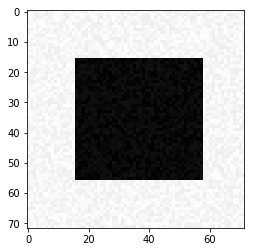

0.0


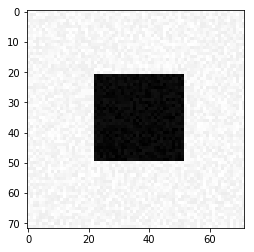

2.0


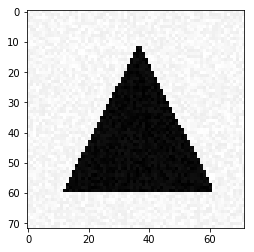

0.0


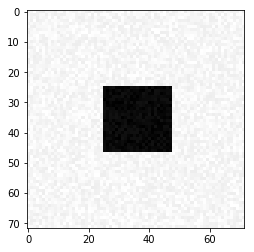

2.0


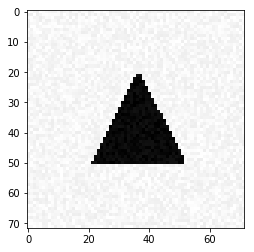

1.0


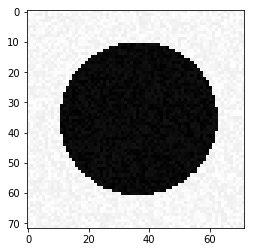

2.0


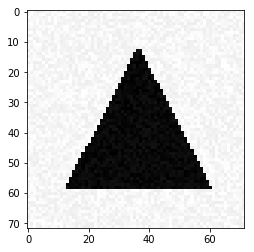

0.0


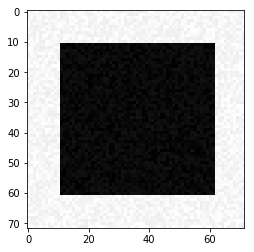

0.0


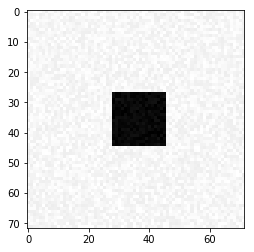

0.0


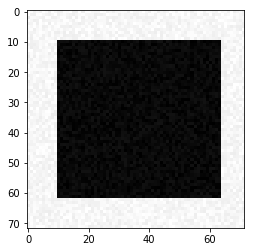

In [66]:
#visualizing some images of the train dataset

for k in np.random.choice(X_train.shape[0],10):
    plt.imshow(X_train[k].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
    print(Y_train[k])
    plt.show()

In [85]:
#building a linear classifier

def build_linear_classifier():
    model = Sequential()
    model.add(Dense(3, input_shape=(IMAGE_SIZE*IMAGE_SIZE,)))
    model.add(Activation('softmax'))
    return model

model = build_linear_classifier()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 3)                 15555     
_________________________________________________________________
activation_12 (Activation)   (None, 3)                 0         
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


In [2]:
optimizers = {
   "sgd" : SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True),
   "adam" : Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
}

In [96]:
categorical_Y_train = to_categorical(Y_train)
categorical_Y_val = to_categorical(Y_val)

losses = {}
trained_models = {}

for (name_opt,opt) in optimizers.items():
    print("\nTraining the model with "+name_opt)

    model = build_linear_classifier()
    model.compile(loss='categorical_crossentropy',optimizer=opt, metrics = ["accuracy"])
    history = model.fit(X_train, categorical_Y_train, validation_data=(X_val,categorical_Y_val), epochs=100, batch_size=32)

    losses[name_opt]= {}
    losses[name_opt]["train"] = history.history['loss']
    losses[name_opt]["val"] = history.history['val_loss']
    
    trained_models[name_opt] = model


Training the model with sgd
Train on 300 samples, validate on 50 samples
Epoch 1/100
300/300 [==============================] - 2s 6ms/step - loss: 1.4658 - acc: 0.3600 - val_loss: 1.3843 - val_acc: 0.4000
Epoch 2/100
300/300 [==============================] - 0s 93us/step - loss: 0.7764 - acc: 0.6267 - val_loss: 0.6203 - val_acc: 0.6600
Epoch 3/100
300/300 [==============================] - 0s 93us/step - loss: 0.5149 - acc: 0.7633 - val_loss: 0.5160 - val_acc: 0.8000
Epoch 4/100
300/300 [==============================] - 0s 93us/step - loss: 0.3949 - acc: 0.8233 - val_loss: 0.4122 - val_acc: 0.7800
Epoch 5/100
300/300 [==============================] - 0s 89us/step - loss: 0.3142 - acc: 0.9100 - val_loss: 0.3452 - val_acc: 0.9400
Epoch 6/100
300/300 [==============================] - 0s 89us/step - loss: 0.2873 - acc: 0.9200 - val_loss: 0.3256 - val_acc: 0.9200
Epoch 7/100
300/300 [==============================] - 0s 99us/step - loss: 0.2482 - acc: 0.9467 - val_loss: 0.3223 - val_a

300/300 [==============================] - 0s 94us/step - loss: 0.0788 - acc: 0.9967 - val_loss: 0.1168 - val_acc: 1.0000
Epoch 22/100
300/300 [==============================] - 0s 90us/step - loss: 0.0756 - acc: 0.9933 - val_loss: 0.0995 - val_acc: 1.0000
Epoch 23/100
300/300 [==============================] - 0s 108us/step - loss: 0.0740 - acc: 0.9967 - val_loss: 0.1074 - val_acc: 1.0000
Epoch 24/100
300/300 [==============================] - 0s 86us/step - loss: 0.0721 - acc: 0.9933 - val_loss: 0.1096 - val_acc: 1.0000
Epoch 25/100
300/300 [==============================] - 0s 90us/step - loss: 0.0628 - acc: 1.0000 - val_loss: 0.0972 - val_acc: 1.0000
Epoch 26/100
300/300 [==============================] - 0s 90us/step - loss: 0.0575 - acc: 1.0000 - val_loss: 0.0918 - val_acc: 1.0000
Epoch 27/100
300/300 [==============================] - 0s 84us/step - loss: 0.0563 - acc: 1.0000 - val_loss: 0.0960 - val_acc: 0.9800
Epoch 28/100
300/300 [==============================] - 0s 93us/ste

Epoch 82/100
300/300 [==============================] - 0s 105us/step - loss: 0.0122 - acc: 1.0000 - val_loss: 0.0213 - val_acc: 1.0000
Epoch 83/100
300/300 [==============================] - 0s 111us/step - loss: 0.0106 - acc: 1.0000 - val_loss: 0.0204 - val_acc: 1.0000
Epoch 84/100
300/300 [==============================] - 0s 103us/step - loss: 0.0099 - acc: 1.0000 - val_loss: 0.0199 - val_acc: 1.0000
Epoch 85/100
300/300 [==============================] - 0s 106us/step - loss: 0.0099 - acc: 1.0000 - val_loss: 0.0189 - val_acc: 1.0000
Epoch 86/100
300/300 [==============================] - 0s 112us/step - loss: 0.0098 - acc: 1.0000 - val_loss: 0.0207 - val_acc: 1.0000
Epoch 87/100
300/300 [==============================] - 0s 102us/step - loss: 0.0090 - acc: 1.0000 - val_loss: 0.0177 - val_acc: 1.0000
Epoch 88/100
300/300 [==============================] - 0s 98us/step - loss: 0.0094 - acc: 1.0000 - val_loss: 0.0182 - val_acc: 1.0000
Epoch 89/100
300/300 [===========================

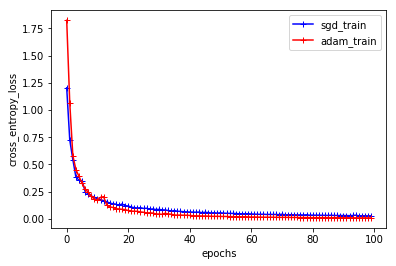

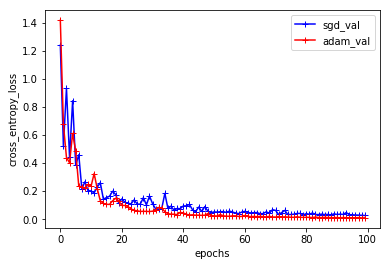

In [92]:
epochs = np.arange(len(losses['sgd']['train']))
plt.plot(epochs,losses["sgd"]['train'],marker="+",color="b",label="sgd_train")
plt.plot(epochs,losses["adam"]['train'],marker="+",color="r",label="adam_train")
plt.xlabel("epochs") ; plt.ylabel("cross_entropy_loss") ; plt.legend()
plt.show()

plt.plot(epochs,losses["sgd"]['val'],marker="+",color="b",label="sgd_val")
plt.plot(epochs,losses["adam"]['val'],marker="+",color="r",label="adam_val")
plt.xlabel("epochs") ; plt.ylabel("cross_entropy_loss") ; plt.legend()
plt.show()

In [112]:
categorical_Y_test = to_categorical(Y_test)
res = trained_models["sgd"].evaluate(X_test, categorical_Y_test)
print("SGD optimizer.\ncross-entropy loss, accurracy score : ",res,"\n")

res = trained_models["adam"].evaluate(X_test, categorical_Y_test)
print("Adam optimizer.\ncross-entropy loss, accurracy score : ",res)

300/300 [==============================] - 0s 55us/step
SGD optimizer.
cross-entropy loss, accurracy score :  [0.032662584433952965, 1.0] 

300/300 [==============================] - 0s 51us/step
Adam optimizer.
cross-entropy loss, accurracy score :  [0.011141655817627907, 1.0]


# Part 2 - Visualization of the Solution

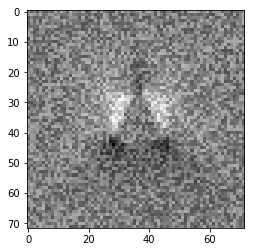

In [123]:
#visualizing the weights of the three neurons

model = trained_models["adam"]
W = model.get_weights()[0] #only focus on W (not intercept)

for neuron in range(W.shape[1]):
    plt.imshow(W[:,neuron].reshape((IMAGE_SIZE,IMAGE_SIZE)), cmap='gray')

# Part 3 - A More Difficult Classification Problem

## a)  a linear classifier can"t learn the classification frontiers

In [246]:
[X, Y] = generate_dataset_classification(650, noise=20, free_location=True)
[X_train, Y_train] = [X[:300],Y[:300]]
[X_val, Y_val] = [X[300:350],Y[300:350]]
[X_test, Y_test] = [X[350:],Y[350:]]

categorical_Y_train = to_categorical(Y_train)
categorical_Y_val = to_categorical(Y_val)
categorical_Y_test = to_categorical(Y_test)

#alternatively, we could have used generate_test_set_classification(300)

Creating data:
Done


In [181]:
model = build_linear_classifier()
model.compile(loss='categorical_crossentropy',optimizer=optimizers["sgd"], metrics = ["accuracy"])
history = model.fit(X_train, categorical_Y_train, validation_data=(X_val,categorical_Y_val), epochs=100, batch_size=32)

Train on 300 samples, validate on 50 samples
Epoch 1/100
300/300 [==============================] - 2s 7ms/step - loss: 2.3707 - acc: 0.2533 - val_loss: 1.3173 - val_acc: 0.2800
Epoch 2/100
300/300 [==============================] - 0s 91us/step - loss: 1.4982 - acc: 0.3733 - val_loss: 1.6145 - val_acc: 0.4200
Epoch 3/100
300/300 [==============================] - 0s 98us/step - loss: 1.1651 - acc: 0.4433 - val_loss: 1.3385 - val_acc: 0.5200
Epoch 4/100
300/300 [==============================] - 0s 105us/step - loss: 0.9609 - acc: 0.5633 - val_loss: 1.3472 - val_acc: 0.4200
Epoch 5/100
300/300 [==============================] - 0s 91us/step - loss: 1.0887 - acc: 0.5033 - val_loss: 0.8790 - val_acc: 0.5200
Epoch 6/100
300/300 [==============================] - 0s 86us/step - loss: 0.9330 - acc: 0.5867 - val_loss: 0.7990 - val_acc: 0.6600
Epoch 7/100
300/300 [==============================] - 0s 100us/step - loss: 1.1462 - acc: 0.5500 - val_loss: 1.2671 - val_acc: 0.4200
Epoch 8/100
300/

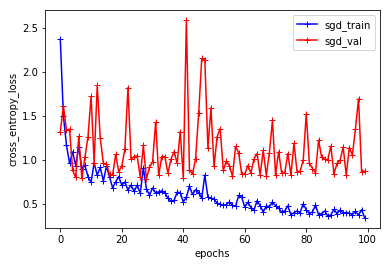

In [182]:
epochs = np.arange(len(history.history['loss']))
plt.plot(epochs,history.history['loss'],marker="+",color="b",label="sgd_train")
plt.plot(epochs,history.history['val_loss'],marker="+",color="r",label="sgd_val")
plt.xlabel("epochs") ; plt.ylabel("cross_entropy_loss") ; plt.legend()
plt.show()

In [183]:
res = model.evaluate(X_test, categorical_Y_test)
print("SGD optimizer.\ncross-entropy loss, accurracy score : ",res,"\n")

300/300 [==============================] - 0s 45us/step
SGD optimizer.
cross-entropy loss, accurracy score :  [0.9667399930953979, 0.5966666662693023] 



## b)  let us build a simple convolutional network

In [257]:
def build_convolutional_network():
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
    model.add(Flatten())
    size = (IMAGE_SIZE-4)/2
    model.add(Dense(3, input_shape=(16*size*size,)))
    model.add(Activation('softmax'))
    return model

In [271]:
[X, Y] = generate_dataset_classification(1350, noise=20, free_location=True)
[X_train, Y_train] = [X[:1000],Y[:1000]]
[X_val, Y_val] = [X[1000:1100],Y[1000:1100]]
[X_test, Y_test] = [X[1100:],Y[1100:]]

categorical_Y_train = to_categorical(Y_train)
categorical_Y_val = to_categorical(Y_val)
categorical_Y_test = to_categorical(Y_test)

Creating data:
Done


In [55]:
def reshape_as_images(X):
    nb_samples = X.shape[0]
    X2 = np.zeros((nb_samples,IMAGE_SIZE,IMAGE_SIZE,1))
    for k in range(nb_samples):
        X2[k,:] = np.reshape(X[k,:],(IMAGE_SIZE,IMAGE_SIZE,1))
    return X2

print(X_train.shape)
X_train = reshape_as_images(X_train)
print(X_train.shape)

X_val = reshape_as_images(X_val)
X_test = reshape_as_images(X_test)

(300, 5184)
(300, 72, 72, 1)


In [273]:
model = build_convolutional_network()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=optimizers["sgd"], metrics = ["accuracy"])
history = model.fit(X_train, categorical_Y_train, validation_data=(X_val,categorical_Y_val), epochs=100, batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 68, 68, 16)        416       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_43 (Flatten)         (None, 18496)             0         
_________________________________________________________________
dense_67 (Dense)             (None, 3)                 55491     
_________________________________________________________________
activation_65 (Activation)   (None, 3)                 0         
Total params: 55,907
Trainable params: 55,907
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 50 samples
Epoch 1/100
1000/1000 [==============================] - 4s 4ms/step - loss: 1.0825 - acc: 0

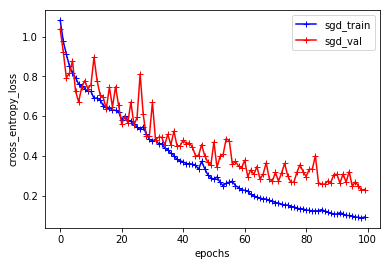

In [274]:
epochs = np.arange(len(history.history['loss']))
plt.plot(epochs,history.history['loss'],marker="+",color="b",label="sgd_train")
plt.plot(epochs,history.history['val_loss'],marker="+",color="r",label="sgd_val")
plt.xlabel("epochs") ; plt.ylabel("cross_entropy_loss") ; plt.legend()
plt.show()

In [277]:
categorical_Y_test = to_categorical(Y_test)
res = model.evaluate(X_test, categorical_Y_test)
print("SGD optimizer.\ncross-entropy loss, accurracy score : ",res,"\n")

300/300 [==============================] - 0s 608us/step
SGD optimizer.
cross-entropy loss, accurracy score :  [0.3048956704139709, 0.8833333333333333] 



# Part 4 - A Regression Problem

## a) without normalizing the triangles 

In [142]:
[X, Y] = generate_dataset_regression(700, noise=20)
[X_train, Y_train] = [X[:300],Y[:300]]
[X_val, Y_val] = [X[300:400],Y[300:400]]
[X_test, Y_test] = [X[400:],Y[400:]]

Creating data:
Done


In [143]:
X_train = reshape_as_images(X_train)
X_val = reshape_as_images(X_val)
X_test = reshape_as_images(X_test)

[0.86194113 0.57972965 0.76216323 0.65444328 0.62562674 0.22254171]


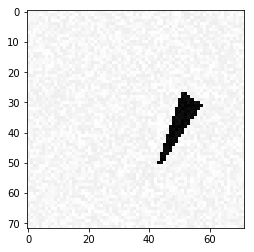

[0.64239    0.1705496  0.42824862 0.60053265 0.23631023 0.77201059]


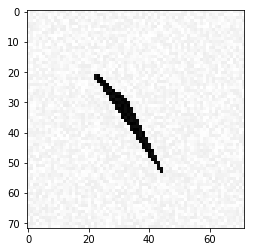

[0.08363888 0.04385458 0.37635029 0.0971629  0.05610048 0.92814573]


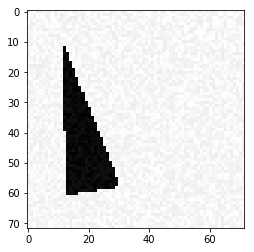

[0.29910814 0.89944752 0.54362601 0.74030025 0.90702387 0.17395572]


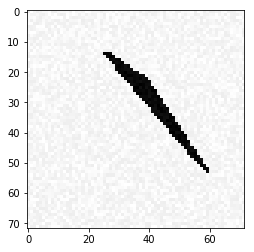

[0.05333327 0.60783597 0.87761032 0.21100266 0.28493323 0.58429904]


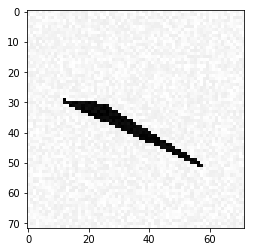

[0.58020178 0.09605525 0.83384643 0.52459157 0.36909725 0.72204304]


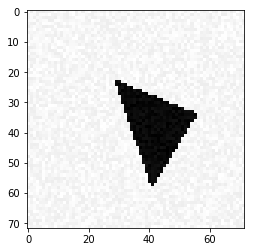

[0.4007678  0.83441634 0.73181751 0.19973093 0.27730108 0.11902946]


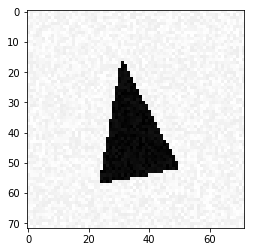

[0.33796902 0.16990285 0.64484692 0.48604954 0.38856058 0.72704442]


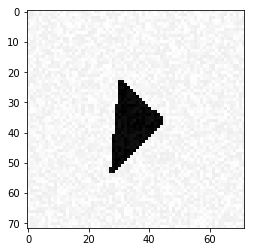

[0.26633105 0.28182229 0.10460792 0.48052881 0.16650336 0.79562536]


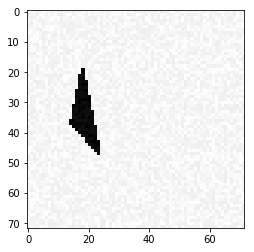

[0.34277827 0.5268738  0.88657285 0.91340825 0.32882962 0.21539304]


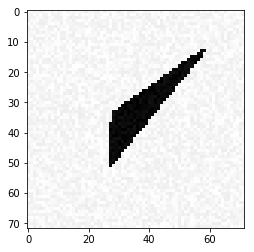

In [144]:
#visualizing some images of the train dataset

for k in np.random.choice(X_train.shape[0],10):
    plt.imshow(X_train[k].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
    print(Y_train[k])
    plt.show()

In [145]:
def build_regressor():
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
    model.add(Flatten())
    size = (IMAGE_SIZE-4)/2
    model.add(Dense(6, input_shape=(16*size*size,)))
    return model

In [307]:
model = build_regressor()
model.summary()
model.compile(loss='mean_squared_error',optimizer=optimizers["sgd"], metrics = ["accuracy"])
history = model.fit(X_train, Y_train, validation_data=(X_val,Y_val), epochs=100, batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 68, 68, 16)        416       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_50 (Flatten)         (None, 18496)             0         
_________________________________________________________________
dense_74 (Dense)             (None, 6)                 110982    
Total params: 111,398
Trainable params: 111,398
Non-trainable params: 0
_________________________________________________________________
Train on 300 samples, validate on 100 samples
Epoch 1/100
300/300 [==============================] - 3s 11ms/step - loss: 0.1652 - acc: 0.1800 - val_loss: 0.0917 - val_acc: 0.1900
Epoch 2/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0904 - acc:

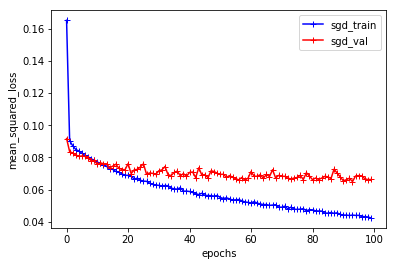

300/300 [==============================] - 0s 614us/step
SGD optimizer.
mean-squared loss loss, accurracy score :  [0.07184357891480128, 0.3200000003973643] 



In [310]:
epochs = np.arange(len(history.history['loss']))
plt.plot(epochs,history.history['loss'],marker="+",color="b",label="sgd_train")
plt.plot(epochs,history.history['val_loss'],marker="+",color="r",label="sgd_val")
plt.xlabel("epochs") ; plt.ylabel("mean_squared_loss") ; plt.legend()
plt.show()

res = model.evaluate(X_test, Y_test)
print("SGD optimizer.\nmean-squared loss loss, accurracy score : ",res,"\n")

## b) normalizing the triangles 

In [194]:
#to "normalize vertices"
#we caracterize a triangle :
# - i) by the position of its mass center
# - ii) by the distance from the mass center to any vertex (center of circumscribed circle) 
# - iii) by the orientation of the vectors from the mass center to each vertex

# with i) and ii) we in fact caracterize the circumscribed circle of the triangle
# and with iii) the orientation of the triangle in this circle
# we still have 6 parameters per triangle !

def normalize_0(Y):
    
    Z = np.zeros((Y.shape[0],6))
    Z[:,0] = (Y[:,0] + Y[:,2] + Y[:,4])/3.  #barycenter
    Z[:,1] = (Y[:,1] + Y[:,3] + Y[:,5])/3.
    
    xGA = Y[:,0] - Z[:,0] 
    yGA = Y[:,1] - Z[:,1]
    Z[:,2] = xGA*xGA + yGA*yGA #distance barycenter to center (radius circumscribed circle)
    
    xGB = Y[:,2] - Z[:,0] 
    yGB = Y[:,3] - Z[:,1]
    xGC = Y[:,4] - Z[:,0] 
    yGC = Y[:,5] - Z[:,1]
    alpha = np.arctan(yGA/xGA) #angle between xA-xG and x-axis
    beta = np.arctan(yGB/xGB) #angle between xB-xG and x-axis
    gamma = np.arctan(yGC/xGC) #angle between xC-xG and x-axis
    M = np.sort(np.array([alpha,beta,gamma]).T,axis=1)
    
    Z[:,3] = np.arctan(M[:,0]) #min of these three angles
    Z[:,4] = np.arctan(M[:,1]) #angle in between
    Z[:,5] = np.arctan(M[:,2]) #max of these three angles
    
    return Z

def normalize_1(Y):
    #sorting vertices by angle with respect to x_axis
    Z = np.zeros((Y.shape[0],6))
    xG = (Y[:,0] + Y[:,2] + Y[:,4])/3.  #barycenter
    yG = (Y[:,1] + Y[:,3] + Y[:,5])/3.
    alpha = np.arctan((Y[:,1]-yG)/(Y[:,0]-xG)) #angle between xA-xG and x-axis
    beta = np.arctan((Y[:,3]-yG)/(Y[:,2]-xG)) #angle between xB-xG and x-axis
    gamma = np.arctan((Y[:,5]-yG)/(Y[:,4]-xG)) #angle between xC-xG and x-axis
    M = np.argsort(np.array([alpha,beta,gamma]).T,axis=1)
    for k in range(M.shape[0]):
        Z[k,0] = Y[k,2*M[k,0]] #abciss vertex with lowest angle
        Z[k,1] = Y[k,2*M[k,0]+1]  
        Z[k,2] = Y[k,2*M[k,1]]
        Z[k,3] = Y[k,2*M[k,1]+1]
        Z[k,4] = Y[k,2*M[k,2]]
        Z[k,5] = Y[k,2*M[k,2]+1]
    return Z

def normalize(Y):
    #sorting vertices by angle with respect to x_axis
    Z = np.zeros((Y.shape[0],6))
    alpha = np.arctan(Y[:,1]/(Y[:,0])) #angle between xA and x-axis
    beta = np.arctan(Y[:,3]/(Y[:,2])) #angle between xB and x-axis
    gamma = np.arctan(Y[:,5]/(Y[:,4])) #angle between xC and x-axis
    M = np.argsort(np.array([alpha,beta,gamma]).T,axis=1)
    for k in range(M.shape[0]):
        Z[k,0] = Y[k,2*M[k,0]] #abciss vertex with lowest angle
        Z[k,1] = Y[k,2*M[k,0]+1]  
        Z[k,2] = Y[k,2*M[k,1]]
        Z[k,3] = Y[k,2*M[k,1]+1]
        Z[k,4] = Y[k,2*M[k,2]]
        Z[k,5] = Y[k,2*M[k,2]+1]
    return Z

Z_train =  normalize(Y_train)
Z_val = normalize(Y_val)
Z_test = normalize(Y_test)

In [195]:
model = build_regressor()
model.summary()
model.compile(loss='mean_squared_error',optimizer=optimizers["sgd"])
history = model.fit(X_train, Z_train, validation_data=(X_val,Z_val), epochs=100, batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 68, 68, 16)        416       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dense_82 (Dense)             (None, 6)                 110982    
Total params: 111,398
Trainable params: 111,398
Non-trainable params: 0
_________________________________________________________________
Train on 300 samples, validate on 100 samples
Epoch 1/100
300/300 [==============================] - 2s 7ms/step - loss: 0.1916 - val_loss: 0.0790
Epoch 2/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0661 - val_loss: 0.0752
Epoch 3/100
300/300 

300/300 [==============================] - 1s 2ms/step - loss: 0.0319 - val_loss: 0.0498
Epoch 73/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0322 - val_loss: 0.0485
Epoch 74/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0316 - val_loss: 0.0473
Epoch 75/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0313 - val_loss: 0.0478
Epoch 76/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0312 - val_loss: 0.0496
Epoch 77/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0312 - val_loss: 0.0474
Epoch 78/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0307 - val_loss: 0.0483
Epoch 79/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0305 - val_loss: 0.0472
Epoch 80/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0306 - val_loss: 0.0481
Epoch 81/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0301 - val_loss: 

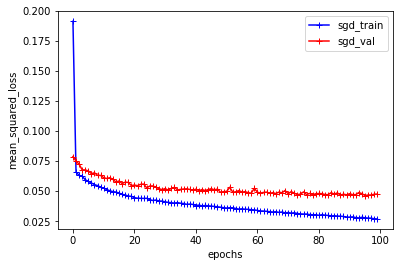

300/300 [==============================] - 0s 938us/step
SGD optimizer.
mean-squared loss loss : 0.09709012746810913 



In [196]:
epochs = np.arange(len(history.history['loss']))
plt.plot(epochs,history.history['loss'],marker="+",color="b",label="sgd_train")
plt.plot(epochs,history.history['val_loss'],marker="+",color="r",label="sgd_val")
plt.xlabel("epochs") ; plt.ylabel("mean_squared_loss") ; plt.legend()
plt.show()

res = model.evaluate(X_test, Y_test)
print("SGD optimizer.\nmean-squared loss loss :",res,"\n")

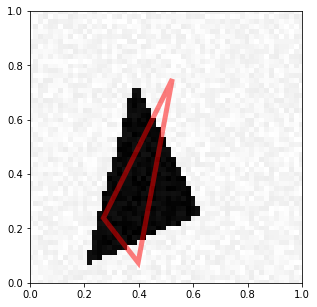

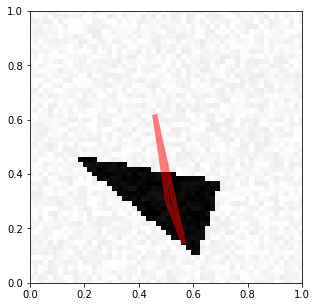

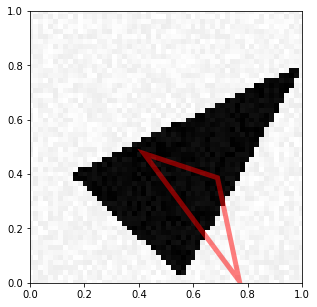

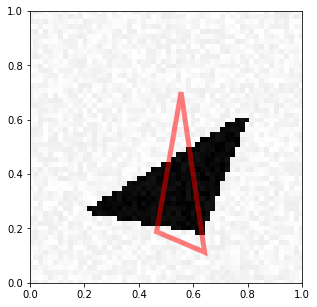

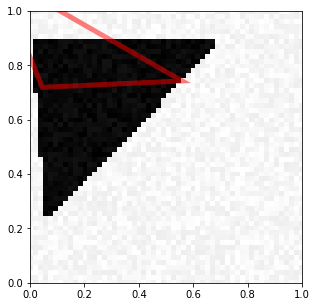

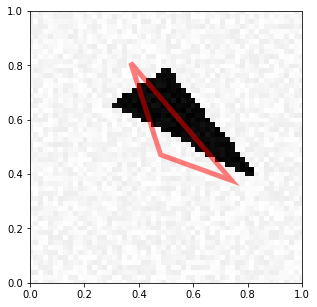

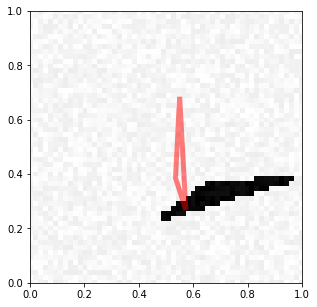

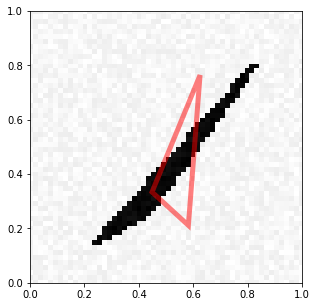

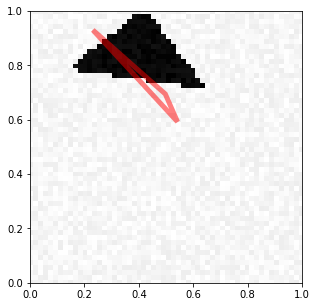

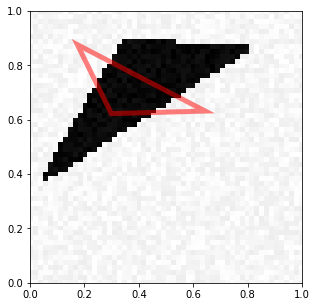

In [197]:
for k in range(10):
    y = model.predict(X_test[k,:][None,:,:,:])
    visualize_prediction(X_test[k,:],y,IMAGE_SIZE)

# Part 5 -  Image Denoising

In [118]:
[X, Y] = generate_dataset_denoising(700, noise=100., free_location=False)
[X_train, Y_train] = [X[:300],Y[:300]]
[X_val, Y_val] = [X[300:400],Y[300:400]]
[X_test, Y_test] = [X[400:],Y[400:]]

Creating data:
Done


Noised image


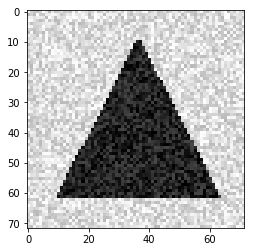

Image without noise


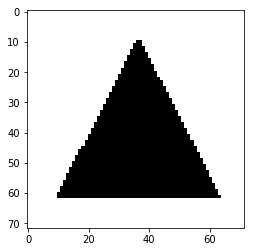

-----------------
Noised image


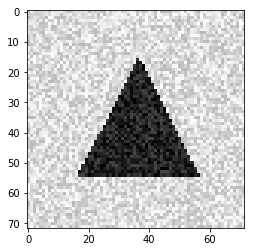

Image without noise


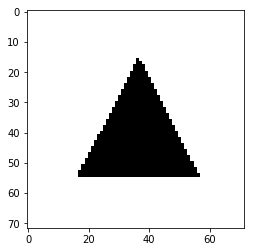

-----------------
Noised image


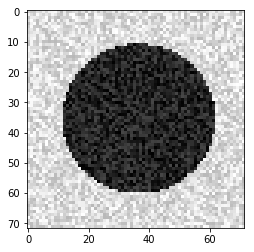

Image without noise


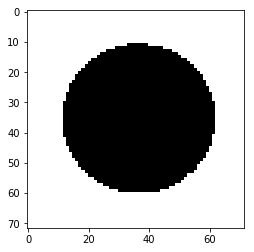

-----------------
Noised image


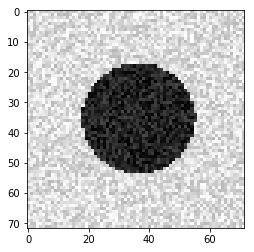

Image without noise


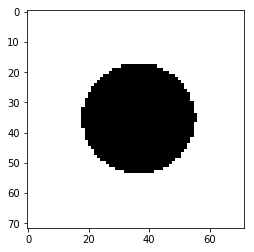

-----------------
Noised image


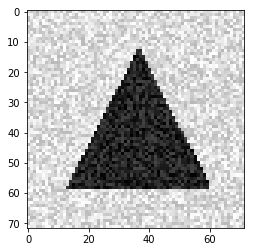

Image without noise


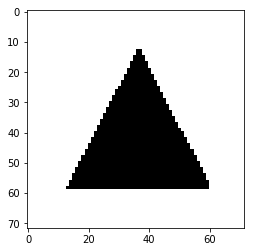

-----------------
Noised image


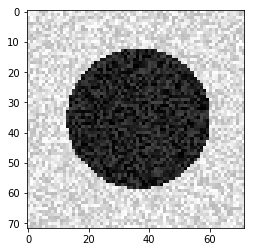

Image without noise


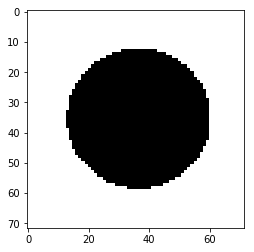

-----------------
Noised image


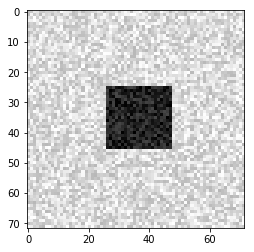

Image without noise


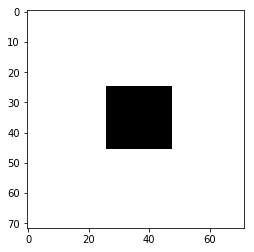

-----------------
Noised image


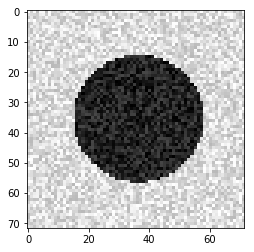

Image without noise


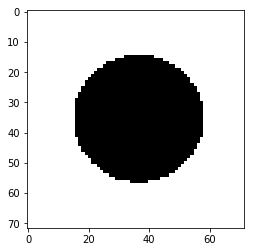

-----------------
Noised image


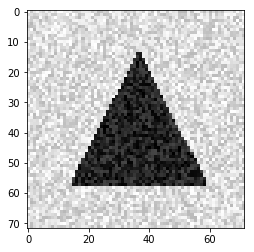

Image without noise


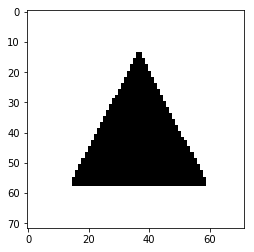

-----------------
Noised image


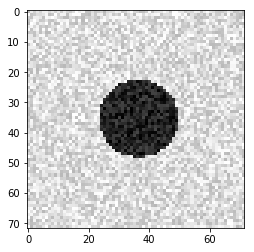

Image without noise


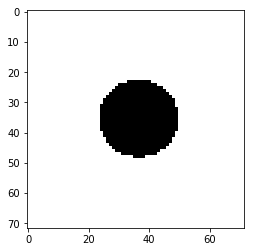

-----------------


In [112]:
#visualizing some images of the train dataset

for k in np.random.choice(X_train.shape[0],10):
    print("Noised image")
    plt.imshow(X_train[k].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
    plt.show()
    print("Image without noise")
    plt.imshow(Y_train[k].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
    plt.show()
    print('-----------------')

In [126]:
X_train = reshape_as_images(X_train)
Y_train = reshape_as_images(Y_train)

X_val = reshape_as_images(X_val)
Y_val = reshape_as_images(Y_val)

X_test = reshape_as_images(X_test)
Y_test = reshape_as_images(X_test)

In [139]:
#We can assume that a latent space of dimension 6 is sufficient
#(triangle : 6, rectangle : 6, circle : 3)

def build_hourglass_network_1():
    model = Sequential()
    #model.add(Dense(256, activation='relu', input_shape=(IMAGE_SIZE*IMAGE_SIZE,)))
    model.add(Dense(64, activation='relu', input_shape=(IMAGE_SIZE*IMAGE_SIZE,)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(6, activation='relu'))
    #model.add(Dense(256, activation='relu'))
    model.add(Dense(IMAGE_SIZE*IMAGE_SIZE, activation='sigmoid'))
    return model   

def build_hourglass_network():
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', padding='same',input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    #model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    #model.add(UpSampling2D((2,2)))
    model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
    model.add(UpSampling2D((4,4)))
    model.add(Conv2D(1, (5, 5), activation='sigmoid', padding='same'))
    return model

In [141]:
model = build_hourglass_network()
model.summary()
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#opt = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error',optimizer=opt)
history = model.fit(X_train, X_train, validation_data=(X_val,X_val), epochs=10, batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 72, 72, 16)        416       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 18, 18, 16)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 18, 18, 16)        6416      
_________________________________________________________________
up_sampling2d_16 (UpSampling (None, 72, 72, 16)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 72, 72, 1)         401       
Total params: 7,233
Trainable params: 7,233
Non-trainable params: 0
_________________________________________________________________
Train on 300 samples, validate on 100 samples
Epoch 1/10
300/300 [==============================] - 5s 16ms/step - loss: 0.0811 - val_loss: 

In [ ]:
epochs = np.arange(len(history.history['loss']))
plt.plot(epochs,history.history['loss'],marker="+",color="b",label="sgd_train")
plt.plot(epochs,history.history['val_loss'],marker="+",color="r",label="sgd_val")
plt.xlabel("epochs") ; plt.ylabel("mean_squared_error loss") ; plt.legend()
plt.show()

res = model.evaluate(X_test, Y_test)
print("SGD optimizer.\nmean_squared_error loss : ",res,"\n")

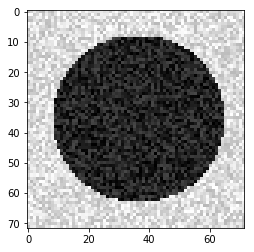

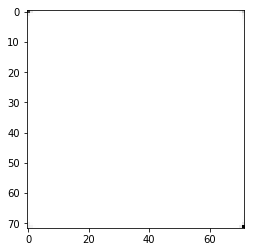

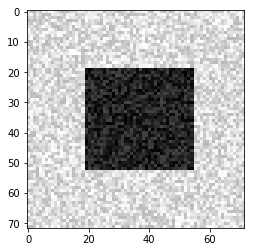

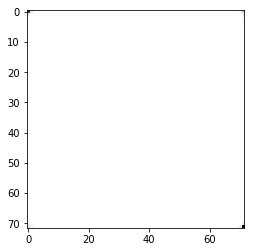

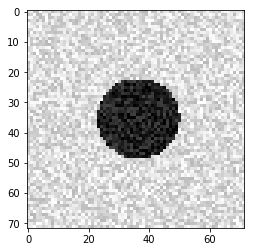

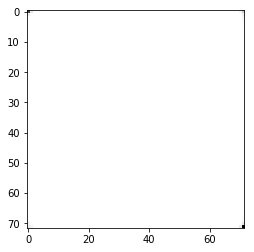

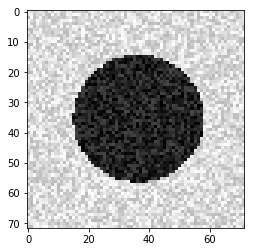

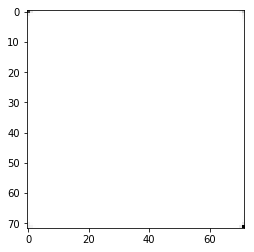

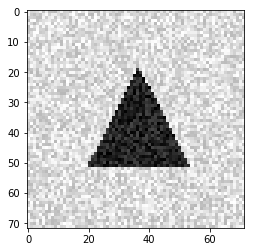

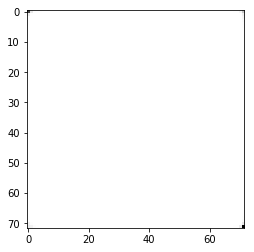

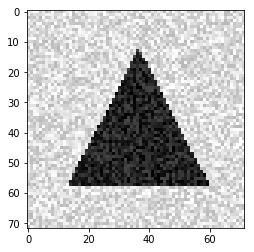

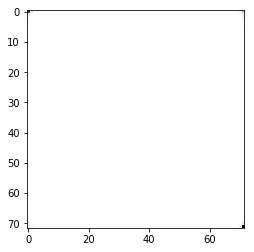

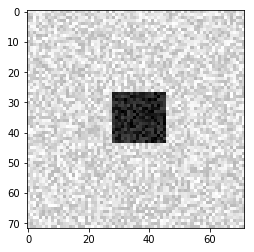

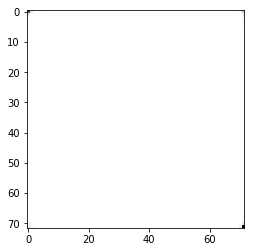

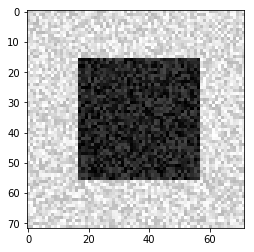

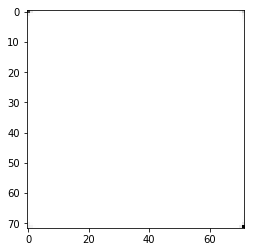

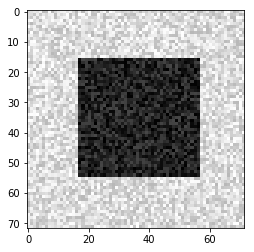

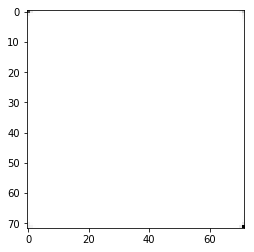

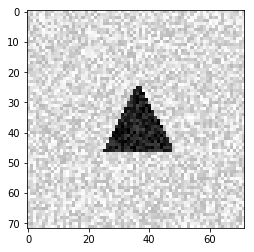

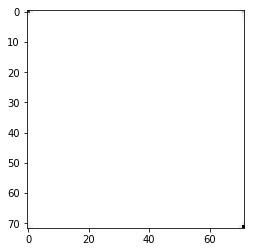

In [138]:
denoised_images =  model.predict(X_test[0:10])
for k in range(10):
    denoised_images[k] = model.predict(X_test[k][None,:])
    plt.imshow(X_test[k].reshape((IMAGE_SIZE,IMAGE_SIZE)),cmap='gray')
    plt.show()
    plt.imshow(denoised_images[k].reshape((IMAGE_SIZE,IMAGE_SIZE)),cmap='gray')
    plt.show()